# Project 12: Simulating Randomness

In [1]:
import random
import numpy as np
import pandas as pd

def run_monte_carlo(mean, sigma, num_sims, index):
    sim_dict = {}
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)

    return sim_dict

mean = 0
sigma = 1
# number of simulations
num_sims = 2000
# number of periods per simulations
index = np.arange(2000)
monte_carlo_sim_dict = run_monte_carlo(mean, sigma, num_sims, index)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)
monte_carlo_sim_df

0         1         2         3         4         5         6     \
0     1.733859  0.373464  2.167240  0.590052 -0.252034 -0.262747 -1.207860   
1     0.334154 -1.058476  1.949079  0.283249 -0.236466 -0.469364 -1.803016   
2    -1.258945  0.994751 -1.168041  0.232504 -0.137878 -1.122293 -1.151097   
3     1.350392 -0.601450 -2.014715 -0.849875  0.545156  0.113033  0.818086   
4     0.480732  0.709649  1.397064  2.445670 -0.717223 -0.126444 -1.156941   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.545332 -0.629337  0.179630  0.472840  0.620733 -0.170546  0.319240   
1996 -0.040717 -1.670655 -0.730342 -0.621059  0.385227  0.314527 -0.933991   
1997 -1.052440 -0.126626 -1.290943 -1.593186 -1.076103  0.991592 -0.415812   
1998  0.746877  1.495500  2.111757 -0.268324  2.680455 -1.045587  1.343094   
1999  0.354990 -1.470636  0.689707  0.096674 -0.412755 -0.790087  2.221474   

          7         8         9     ...      1990      1991      1992  \
0     0.050561 -0.410295  0.170975  ... -0.496124  0.019742 -1.695275   
1    -0.897198  0.079784 -2.392179  ...  0.329076 -0.666720  0.970277   
2     0.398479 -0.431215 -0.920999  ...  1.982877 -0.715404 -0.912224   
3    -0.727721 -0.208086  0.065222  ...  0.791582  0.697984 -2.398881   
4    -0.406461 -1.154681  1.764019  ... -0.546290 -0.086139 -0.017002   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.016835  2.047322 -0.649901  ... -0.251941 -0.419718 -0.447938   
1996 -0.508561 -0.826999  2.390157  ... -0.147486 -2.050313  1.212243   
1997  0.167130  0.738247 -0.616599  ...  1.072701 -0.444254 -0.042102   
1998 -0.130273 -0.888195  0.725957  ... -0.096126  0.167595 -0.959370   
1999  0.223377  0.466652  0.990084  ... -0.263597 -0.055548 -0.941478   

          1993      1994      1995      1996      1997      1998      1999  
0    -0.497461 -1.825105  0.449256  1.586718  0.354448 -0.036386  1.018013  
1    -0.235458  0.047334 -1.470156  1.003183  0.456863 -0.507563 -0.273936  
2    -0.530960 -0.018659 -0.377007  1.021738 -0.387166  0.834910  1.776417  
3     0.310990 -0.312838  0.768032 -0.833578  0.828600  0.561118 -0.784092  
4     0.382096 -1.399100 -0.750646  1.010696 -0.098667  0.533725 -0.888507  
...        ...       ...       ...       ...       ...       ...       ...  
1995  0.511104  0.912131 -0.605908 -1.340741 -2.826916  1.168250  1.799774  
1996  1.753642 -0.102524  0.515419 -1.277109 -0.922501 -1.000747 -2.219965  
1997  1.288595  1.026125 -0.813340 -0.087106  1.071035  0.977930 -1.615371  
1998 -1.713016  1.637286 -2.324963 -0.255047 -0.510498 -0.636511 -0.263028  
1999 -1.304447  1.474901  1.171415 -1.816313 -0.743926 -0.364951  1.224061  

[2000 rows x 2000 columns]

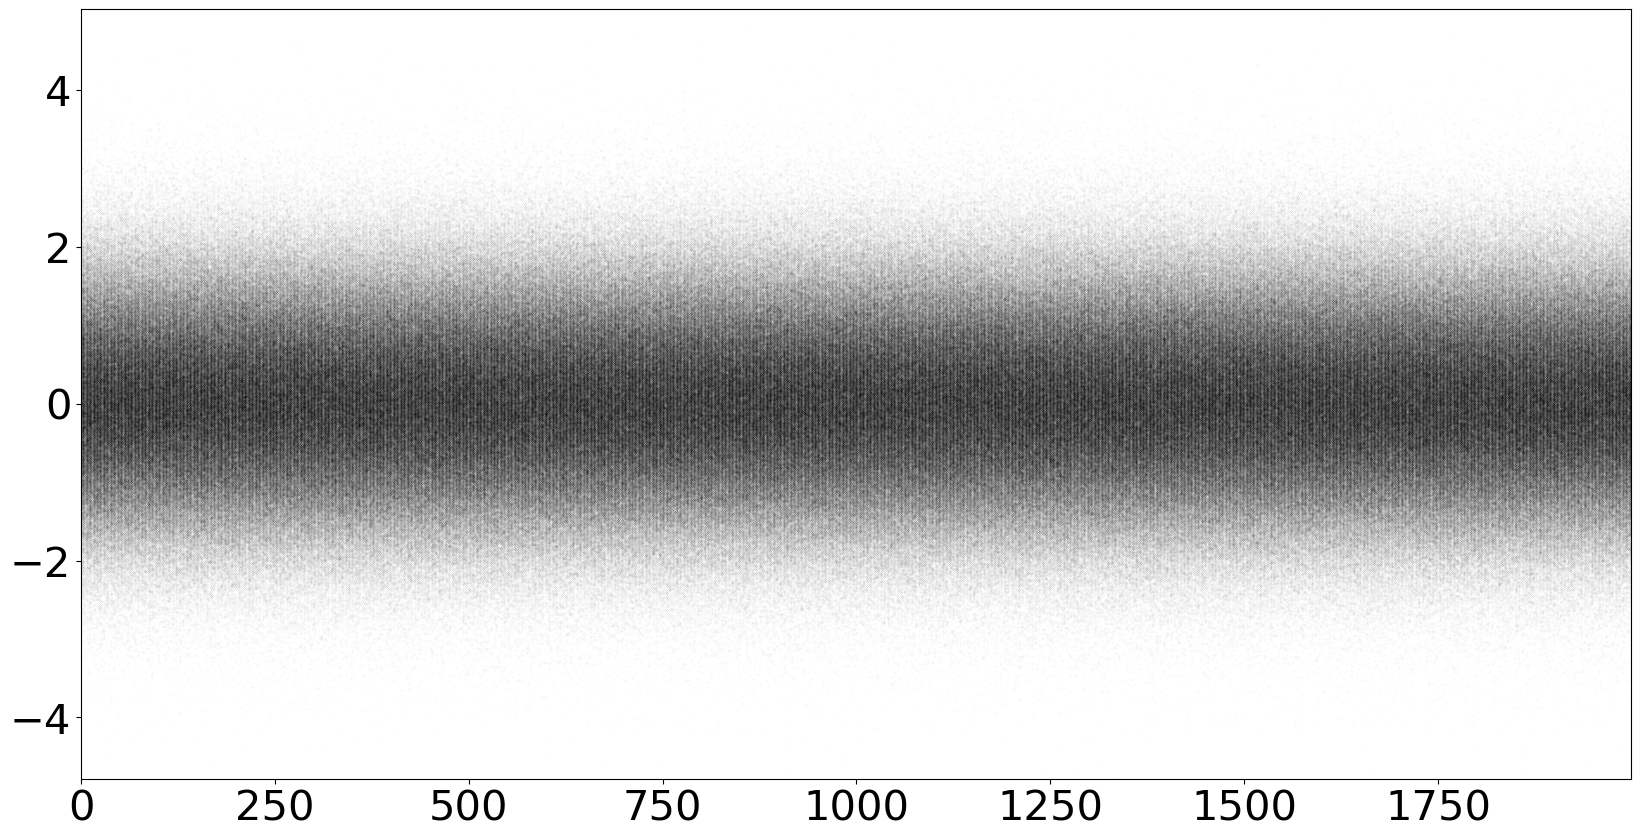

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize = (20,10))
monte_carlo_sim_df.plot.line(legend = False, ls = "", marker = ".", markersize = .05, color = "k", alpha = .5, ax = ax)
plt.show()

<Axes: >

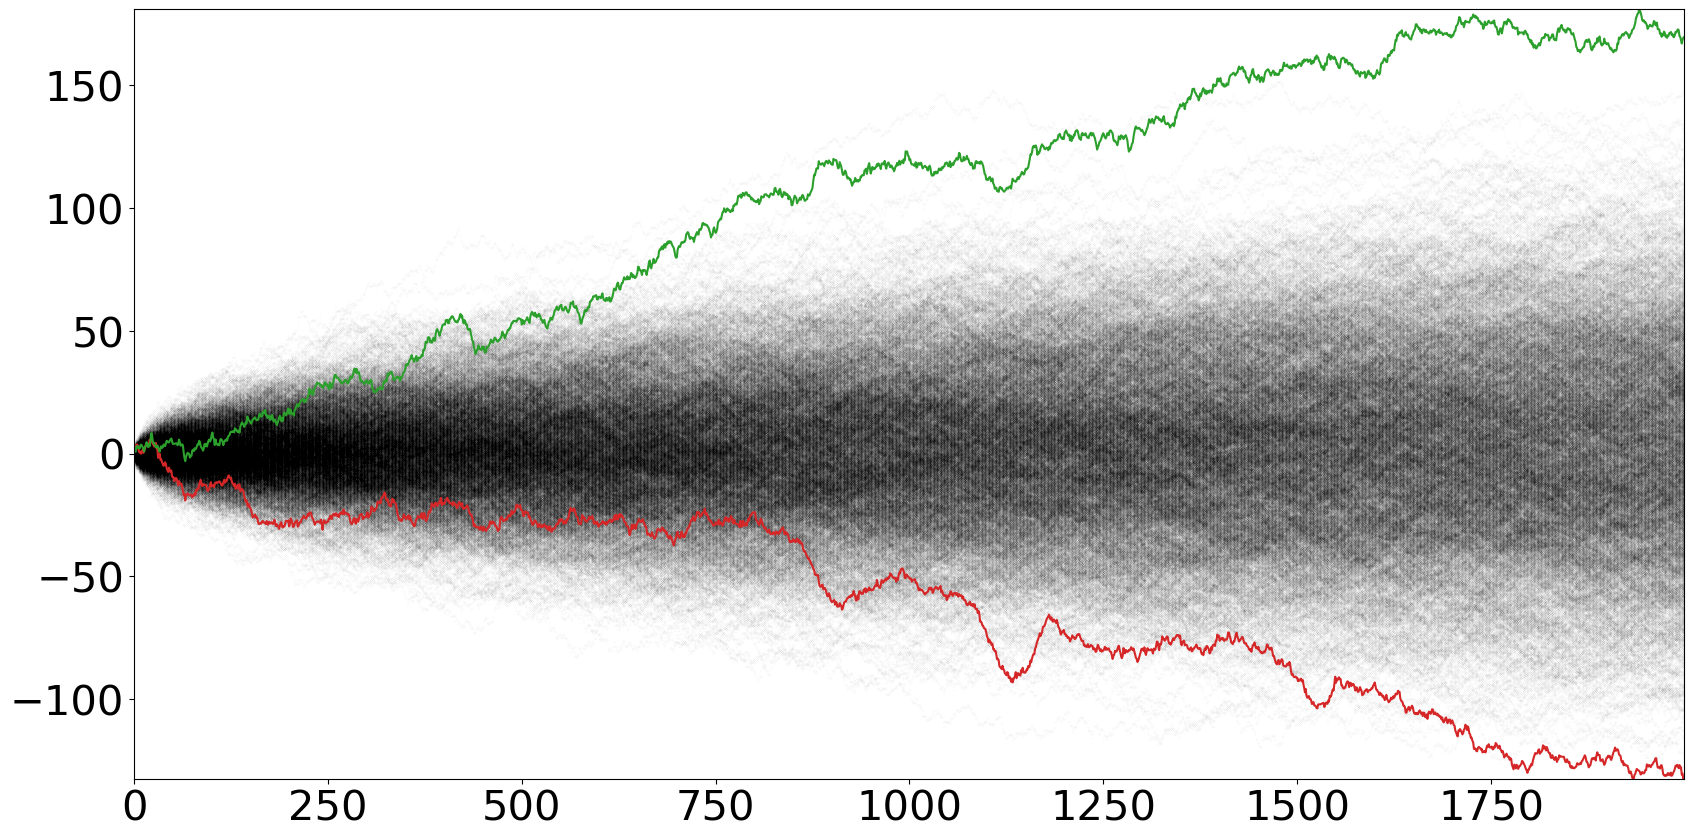

In [3]:
# find the min and max values in the very last period
plot_df = monte_carlo_sim_df.cumsum()
max = plot_df.iloc[-1].max()
min = plot_df.iloc[-1].min()
# find the column with the min and max values
## index of last row refers to the key since key values start at 0
min_key = plot_df.iloc[-1][plot_df.iloc[-1] == min].index
max_key = plot_df.iloc[-1][plot_df.iloc[-1] == max].index

fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.line(legend = False, ls = "", marker = ".", markersize = .05, color = "k", alpha = .5, ax = ax)
plot_df[min_key].plot.line(legend = False, color = "C3", ax = ax)
plot_df[max_key].plot.line(legend = False, color = "C2", ax = ax)

In [4]:
mean = .05
sigma = .5
monte_carlo_sim_dict = run_monte_carlo(mean, sigma, num_sims, index)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df.tail()

0          1           2           3           4           5     \
1995  103.388491  85.824144  107.761538  121.620357  134.727103  108.859204   
1996  103.506778  86.074470  107.279754  121.238266  134.744424  108.519101   
1997  103.952049  85.699461  107.464303  121.225414  135.202358  108.962099   
1998  103.989100  85.625347  108.142687  121.901590  134.948947  109.813447   
1999  103.138262  85.733612  107.630946  121.659154  135.208608  109.585444   

            6          7          8           9     ...       1990  \
1995  139.999308  35.819175  57.369943  122.748456  ...  79.555541   
1996  140.193989  36.170417  56.653707  122.888380  ...  80.428571   
1997  140.443628  36.564365  56.924502  121.807930  ...  79.994248   
1998  141.176052  36.144699  56.850646  122.013548  ...  79.734548   
1999  140.134218  35.957388  57.035456  123.370560  ...  79.426403   

            1991        1992        1993       1994        1995       1996  \
1995  115.319529  137.795601  141.360386  70.667323  121.715918  97.817668   
1996  115.638925  137.637275  141.026404  71.209665  121.536889  98.568701   
1997  115.863512  137.658026  141.363934  71.762362  122.079829  98.895135   
1998  115.479103  137.135572  141.206515  71.741032  122.906912  99.479826   
1999  116.498180  136.687102  141.168776  72.056546  123.187820  99.102551   

           1997        1998       1999  
1995  62.553682  122.860481  35.616629  
1996  62.830753  122.695855  34.944992  
1997  62.485386  122.712424  34.931602  
1998  63.482677  122.411135  34.357441  
1999  63.503632  122.513372  35.251069  

[5 rows x 2000 columns]

22.84369908220828 min 22.84369908220828
174.02057797651165 max 174.02057797651165


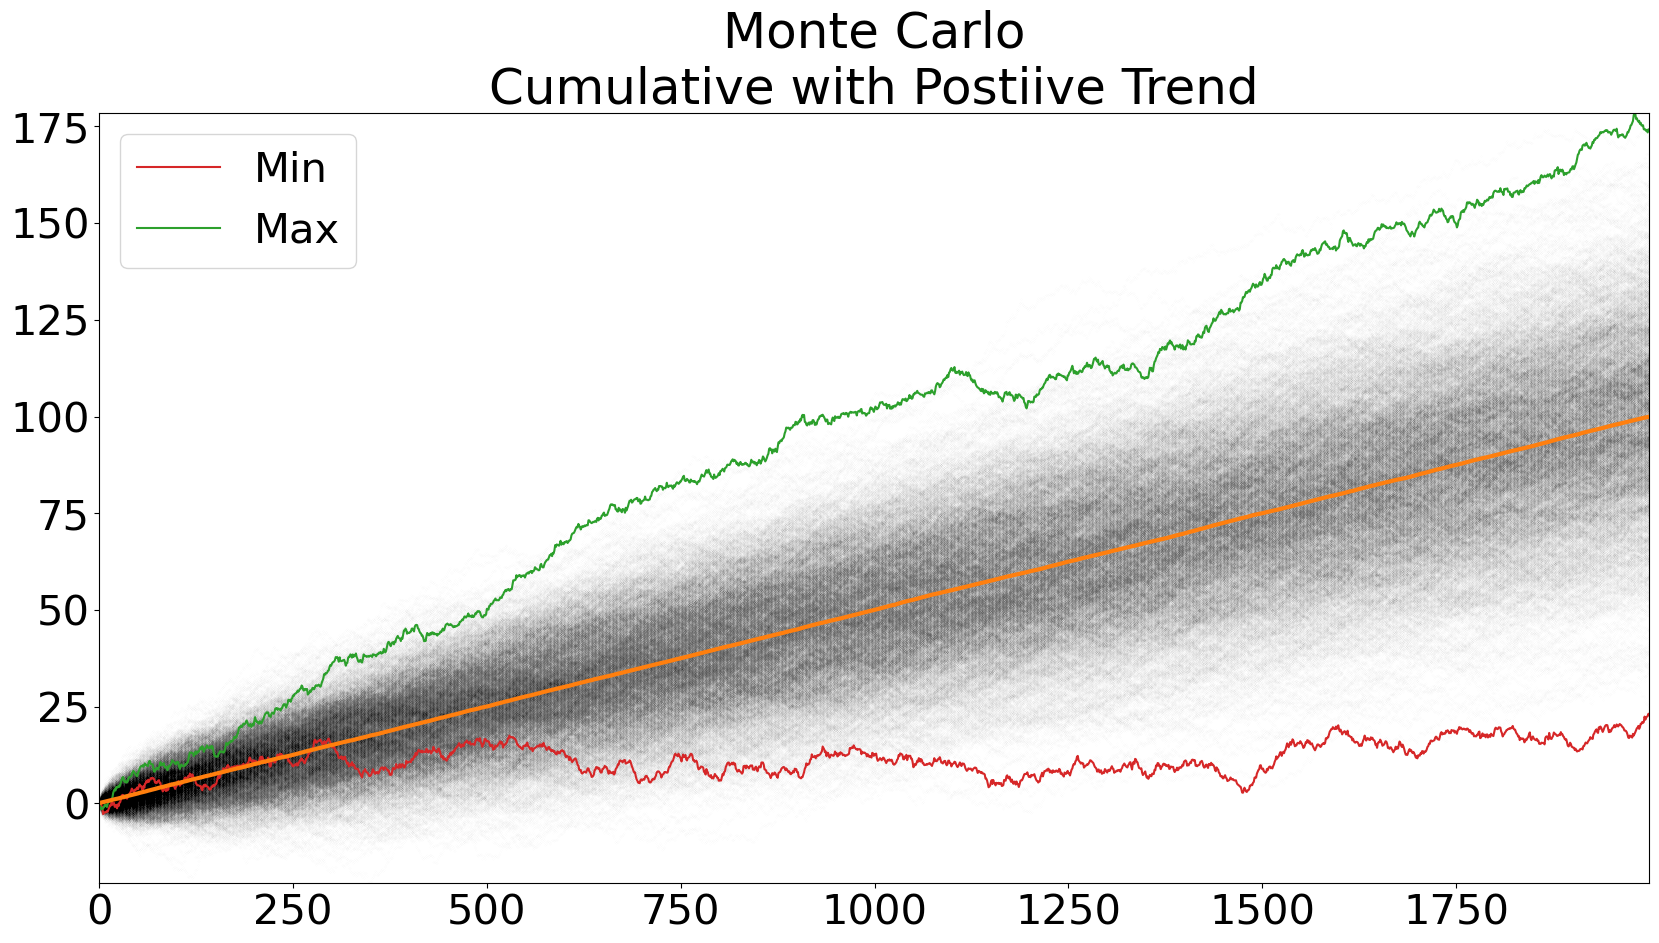

In [5]:
def plot_monte_carlo_sim(sim_data, title = None, logy = True, show_min=False, show_max=False):
    # calculate mean value by period
    sim_data["mean"] = sim_data.mean(axis=1)
    fig, ax = plt.subplots(figsize = (20,10))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
        legend = False, ls = "", marker = ".", markersize = .2, color = "k",
        alpha = .05, logy = logy, ax = ax)

    for i, minmax in enumerate((show_min, show_max)):
        if minmax == True: 
            minmax_str = ["min", "max"][i]
            minmax = getattr(sim_data.iloc[-1], minmax_str)()
            minmax_key = sim_data.iloc[-1][sim_data.iloc[-1] == minmax].index   
            sim_data.plot.line(y = minmax_key, legend = True, label = [minmax_str.title()], color = f"C{3 - i}", ax = ax)
    # prett
    # if show_max:
    #     max = sim_data.iloc[-1].max()
    #     max_key = sim_data.iloc[-1][sim_data.iloc[-1] == max].index    
    #     sim_data.plot.line(y = max_key, legend = True,label = ["Best"], color = "C2", ax = ax)
    # if show_min:
    #     min = sim_data.iloc[-1].min()
    #     min_key = sim_data.iloc[-1][sim_data.iloc[-1] == min].index    
    #     sim_data.plot.line(y = min_key, legend = True, label = ["Worst"], color = "C3", ax = ax)

        
    sim_data["mean"].plot.line(color = "C1", linewidth = 3,
                               logy = logy, ax = ax)
    ax.set_title(title)
    plt.show()
    plt.close()

plot_monte_carlo_sim(monte_carlo_sim_df,
                     title = "Monte Carlo\nCumulative with Postiive Trend", logy = False, show_min = True, show_max = True)

In [6]:
getattr(monte_carlo_sim_df.iloc[-1], "max")()
# monte_carlo_sim_df.iloc[-1].max()

174.02057797651165

In [7]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

In [8]:
start = datetime.datetime(2005,1,1)
end = datetime.datetime.today()
data_dict = {}
stocks = "MSFT", "AAPL", "IBM", "GOOG"
for name in stocks:
    data_dict[name] = web.get_data_yahoo(name, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)
close_data_df.tail()

MSFT        AAPL         IBM        GOOG
Date                                                      
2024-04-24  409.059998  169.020004  184.100006  161.100006
2024-04-25  399.040009  169.889999  168.910004  157.949997
2024-04-26  406.320007  169.300003  167.130005  173.690002
2024-04-29  402.250000  173.500000  167.429993  167.899994
2024-04-30  389.329987  170.330002  166.199997  164.639999

In [10]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change.tail()


MSFT      AAPL       IBM      GOOG
Date                                              
2024-04-24  0.003656  0.012702  0.010484  0.007379
2024-04-25 -0.024495  0.005147 -0.082510 -0.019553
2024-04-26  0.018244 -0.003473 -0.010538  0.099652
2024-04-29 -0.010017  0.024808  0.001795 -0.033335
2024-04-30 -0.032119 -0.018271 -0.007346 -0.019416

In [11]:
close_data_normalized = close_data_pct_change.add(1).cumprod()
close_data_normalized.fillna(1, inplace = True)
close_data_normalized.head()

MSFT      AAPL       IBM      GOOG
Date                                              
2005-01-03  1.000000  1.000000  1.000000  1.000000
2005-01-04  1.003740  1.010270  0.989258  0.959499
2005-01-05  1.001496  1.019118  0.987212  0.954615
2005-01-06  1.000374  1.019908  0.984143  0.930146
2005-01-07  0.997382  1.094169  0.979847  0.956292

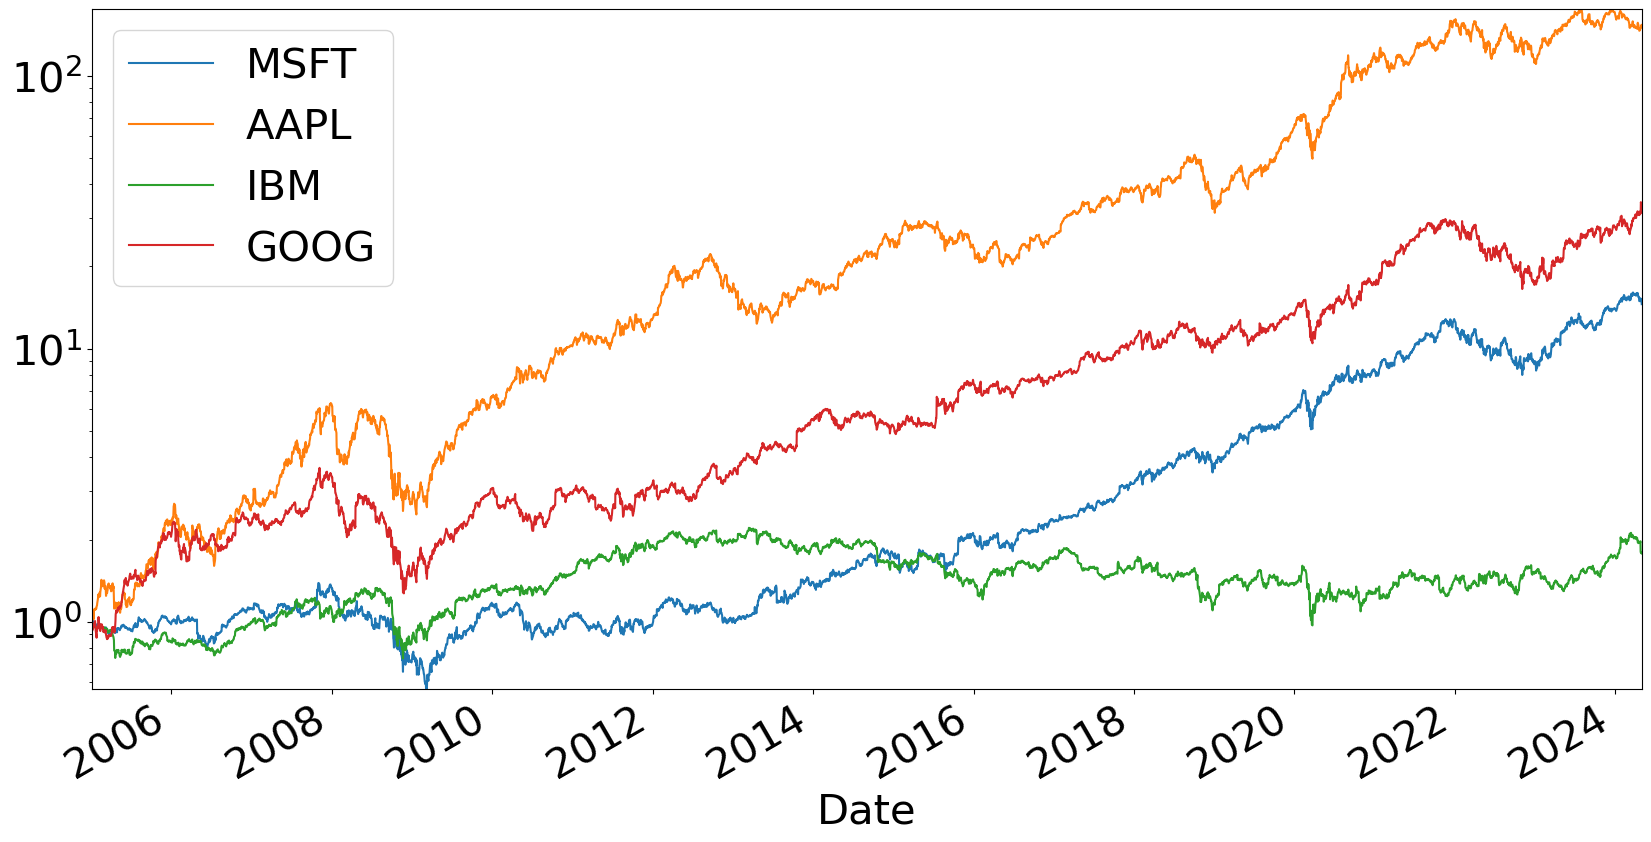

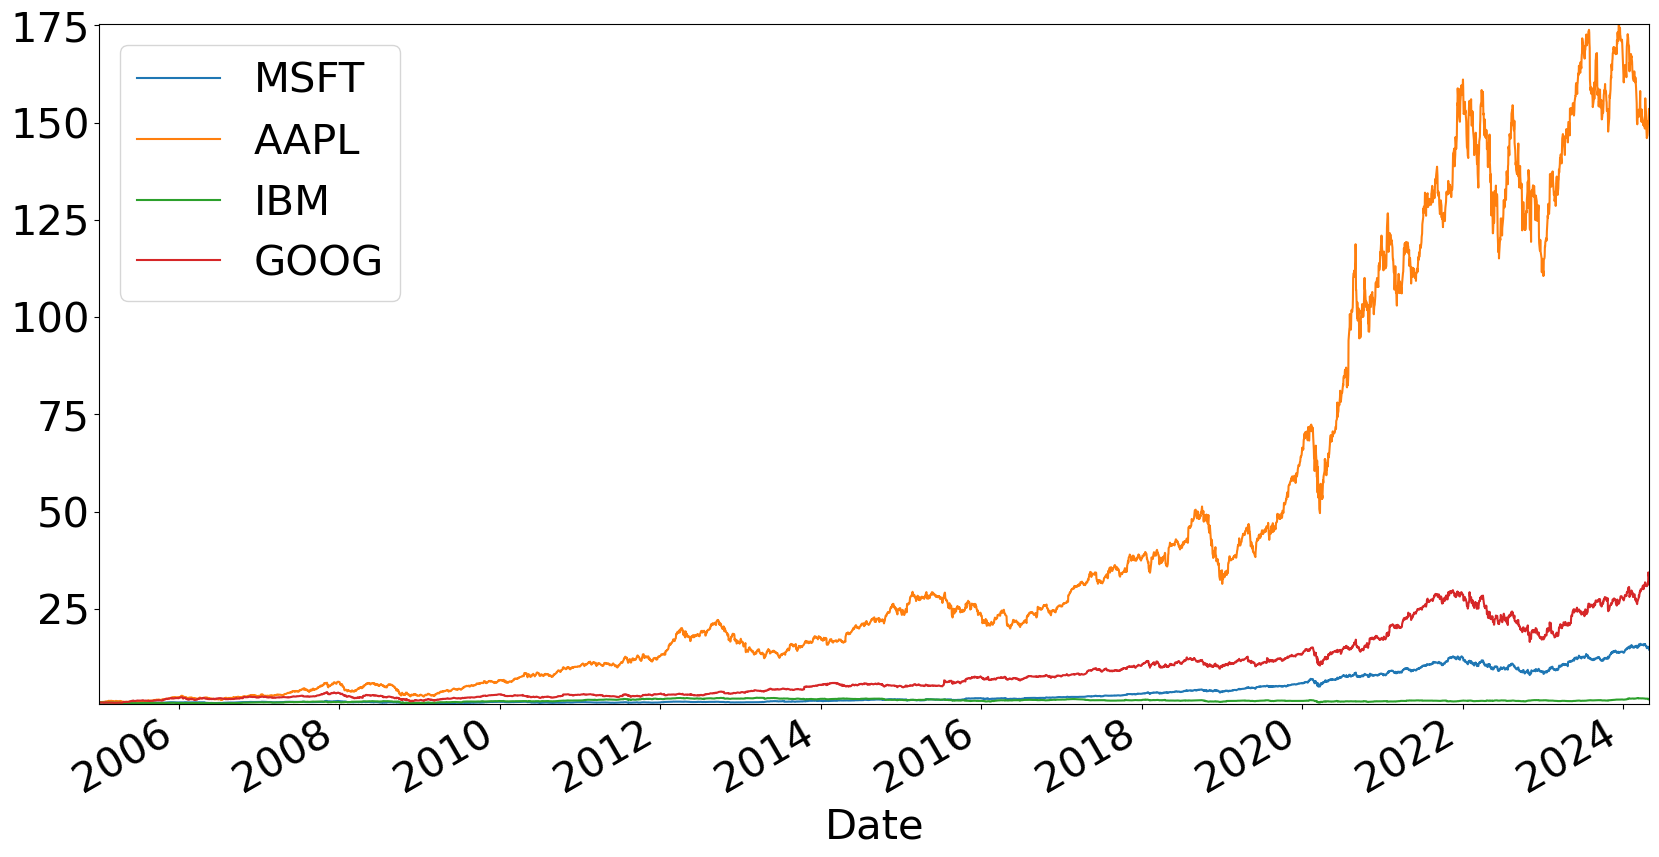

In [12]:
for log in (True, False):
    fig, ax = plt.subplots(figsize = (20,10))
    close_data_normalized.plot.line(ax = ax, logy = log)
    plt.show()
    plt.close()